# **Présentation du projet**

Notre sujet repose sur le classement des équipes de football de l'année 2020-2021, elle comprend les cinq  championnats principaux : English Premier League, French Ligue 1, German Bundesliga, Italian Seria A et Spanish La Liga. 

Pour réaliser des test statistique, nous  avons sélectionné un dataset de footbnall sur Kaggle : https://www.kaggle.com/varpit94/football-teams-rankings-stats

Le dataset comprend 98 lignes et plusieurs colonnes dont :     


Team - Nom de l'équipe
Tournament - Nom du championnat
Goals - Nombre de buts marqués dans le tournoi en 2020-2021
Shots pg - Nombre de tirs par match
Yellow_cards - Nombre de cartons jaunes donnés dans le tournoi en 2020-2021
Red_cards - Nombre de cartons rouges donnés dans le tournoi en 2020-2021
Possession% - Pourcentage de possession de balle.
Pass% - Pourcentage de passes
Aerials won - Duels aériens gagnés par match. 
Rating - Classement général de l'équipe

Dans un premier temps nous allons nettoyer les donnés afin de se débarrasser  des données que nous allons pas utiliser, puis aborder deux problématiques pour lesquelle nous répondrons à partir de différents tests.

Problématique 1 :  Existe-il un lien entre le nombre de buts marqués et tous les autres paramètres ? 

Problématique 2 : Le pourcentage de passe réussi  a t-elle une influence sur le pourcentage de possession de balles ?






#  **Nettoyage de donnnées**

---



In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [2]:
!ls MyDrive/ProjetEstimation/

 Data.csv			      'Rapport_Analyse de données.pdf'
'Football teams.csv'		       script.r
 Projet_CHATHIANATHAN_GUEDIRI.ipynb    tableau.csv
'PROJET CHATHIANATHAN GUEDIRI.ipynb'


In [3]:
%load_ext rpy2.ipython


In [4]:
#Import de la librairie panda
import pandas

In [5]:
#Importer des librairies 
%%R
library(ggplot2)
library(dplyr)

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [6]:
%%R
dataset <- read.csv(file = 'MyDrive/ProjetEstimation/Football teams.csv')

In [7]:
#Nom des colonnes
%%R
colnames(dataset)

 [1] "Team"         "Tournament"   "Goals"        "Shots.pg"     "yellow_cards"
 [6] "red_cards"    "Possession."  "Pass."        "AerialsWon"   "Rating"      


In [8]:
#Affichage des données du dataset
%%R
print(dataset)

                      Team     Tournament Goals Shots.pg yellow_cards red_cards
1          Manchester City Premier League    83     15.8           46         2
2            Bayern Munich     Bundesliga    99     17.1           44         3
3      Paris Saint-Germain        Ligue 1    86     15.0           73         7
4                Barcelona         LaLiga    85     15.3           68         2
5              Real Madrid         LaLiga    67     14.4           57         2
6        Manchester United Premier League    73     13.8           64         1
7                 Juventus        Serie A    77     15.7           76         6
8              Aston Villa Premier League    55     13.7           63         4
9        Borussia Dortmund     Bundesliga    75     14.6           43         1
10         Atletico Madrid         LaLiga    67     12.1          100         0
11                Atalanta        Serie A    90     16.3           66         3
12                 Chelsea Premier Leagu

In [9]:
#Copie du dataset en un data.frame
%%R
df <- data.frame(dataset)

In [10]:
#Ici on retire les colonnes qui nous intéressent pas, c'est-à-dire, 'yellow_cards, red_cards, AerialsWon'
%%R
df <- subset( df, select = -c(yellow_cards, red_cards, AerialsWon))

In [11]:
#Affichage du data.frame df
%%R
df

                      Team     Tournament Goals Shots.pg Possession. Pass.
1          Manchester City Premier League    83     15.8        60.8  89.4
2            Bayern Munich     Bundesliga    99     17.1        58.1  85.5
3      Paris Saint-Germain        Ligue 1    86     15.0        60.1  89.5
4                Barcelona         LaLiga    85     15.3        62.4  89.7
5              Real Madrid         LaLiga    67     14.4        57.7  87.7
6        Manchester United Premier League    73     13.8        54.5  84.8
7                 Juventus        Serie A    77     15.7        55.4  88.3
8              Aston Villa Premier League    55     13.7        49.1  78.6
9        Borussia Dortmund     Bundesliga    75     14.6        57.5  85.5
10         Atletico Madrid         LaLiga    67     12.1        51.8  83.1
11                Atalanta        Serie A    90     16.3        53.5  83.5
12                 Chelsea Premier League    58     14.6        58.6  87.0
13               Liverpoo

# **Observation globale**

---



1.   Tableau d'effectif
2.   Tableau de contingence
3.   Tableau de proportions



Nous allons faire une observation globale avant de faire une analyse approfondi.

In [12]:
#Observation globale
%%R
summary(df)

     Team            Tournament            Goals          Shots.pg    
 Length:98          Length:98          Min.   :20.00   Min.   : 7.10  
 Class :character   Class :character   1st Qu.:40.25   1st Qu.:10.32  
 Mode  :character   Mode  :character   Median :50.00   Median :11.45  
                                       Mean   :52.18   Mean   :11.85  
                                       3rd Qu.:61.75   3rd Qu.:13.35  
                                       Max.   :99.00   Max.   :17.10  
  Possession.        Pass.           Rating     
 Min.   :38.50   Min.   :66.50   Min.   :6.410  
 1st Qu.:46.23   1st Qu.:78.03   1st Qu.:6.540  
 Median :49.75   Median :80.80   Median :6.630  
 Mean   :50.00   Mean   :80.44   Mean   :6.646  
 3rd Qu.:52.85   3rd Qu.:83.45   3rd Qu.:6.730  
 Max.   :62.40   Max.   :89.70   Max.   :7.010  


In [13]:
# 1.Tableau d'effectif, nombre d'équipes par championnats
%%R
eff <-table(df$Tournament)
eff


    Bundesliga         LaLiga        Ligue 1 Premier League        Serie A 
            18             20             20             20             20 


In [14]:
# 2.Tableau de contingence, savoir dans quel championnat évolue uneéquipe
%%R
cont<-table(df$Tournament,df$Team)
cont

                
                 AC Milan Angers Arminia Bielefeld Arsenal Aston Villa Atalanta
  Bundesliga            0      0                 1       0           0        0
  LaLiga                0      0                 0       0           0        0
  Ligue 1               0      1                 0       0           0        0
  Premier League        0      0                 0       1           1        0
  Serie A               1      0                 0       0           0        1
                
                 Athletic Bilbao Atletico Madrid Augsburg Barcelona
  Bundesliga                   0               0        1         0
  LaLiga                       1               1        0         1
  Ligue 1                      0               0        0         0
  Premier League               0               0        0         0
  Serie A                      0               0        0         0
                
                 Bayer Leverkusen Bayern Munich Benevento Bol

Ce tableau nous permet de savoir dans quel championnat évolue chaque équipe (1 si l'équipe évolue dans le championnat et 0 si non).

In [15]:
#3.Tableau de proportions
%%R
prop <- prop.table(table(df$Tournament,df$Team))
prop

                
                   AC Milan     Angers Arminia Bielefeld    Arsenal Aston Villa
  Bundesliga     0.00000000 0.00000000        0.01020408 0.00000000  0.00000000
  LaLiga         0.00000000 0.00000000        0.00000000 0.00000000  0.00000000
  Ligue 1        0.00000000 0.01020408        0.00000000 0.00000000  0.00000000
  Premier League 0.00000000 0.00000000        0.00000000 0.01020408  0.01020408
  Serie A        0.01020408 0.00000000        0.00000000 0.00000000  0.00000000
                
                   Atalanta Athletic Bilbao Atletico Madrid   Augsburg
  Bundesliga     0.00000000      0.00000000      0.00000000 0.01020408
  LaLiga         0.00000000      0.01020408      0.01020408 0.00000000
  Ligue 1        0.00000000      0.00000000      0.00000000 0.00000000
  Premier League 0.00000000      0.00000000      0.00000000 0.00000000
  Serie A        0.01020408      0.00000000      0.00000000 0.00000000
                
                  Barcelona Bayer Leverkuse

Ce tableau nous indique la proportion de chaque équipe (0.1020408) ainsi que dans quel championnat, elle évolue. La somme de toutes les proportions donnent 1, ce qui est cohérent, car une équipe ne peut appartenir qu'à un seul championnat.

# *Analyse entre le nombre de buts marqués et les autres paramètres (variables)*

---
##Problématique : Existe-il un lien entre le nombre de buts marqués et tous les autres paramètres ? 

###      **Analyse préliminaire**


1.   Moyenne de buts de toutes les équipes tout championnat confondus
2.   Écart-type de buts de toutes les équipes tout championnat confondus
3.   Médiane de buts de toutes les équipes tout championnat confondus
4.   Évaluation de la densité

###      **Différents types de visualisations**


1.   Histogramme
2.   Diagramme en barre
3.   Intervalle de confiance


###     **Analyse appronfondie**




Dans un premier temps, nous ferons plusieurs analyses pour appuyer notre propos.

1.   Les 5 meilleurs équipes en terme de buts marqués
2.   Les 5 pires équipes en termes de buts marqués



> **Remarque**


3.   Moyenne des 5 meilleures équipes en terme de buts marqués
4.   Moyenne des 5 pires équipes en terme de buts marqués


> **Remarque**

5.  Nuage de points
6.  Droite de regression
###   **Conclusion**






In [16]:
# 1.Moyenne de buts de toutes les équipes tout championnat confondu
%%R
moy <-sapply(df,mean)
print(moy["Goals"])



   Goals 
52.18367 


La moyenne de buts est de 52,18 pour toutes les équipes de tous les championnats confondus.

In [17]:
# 2.Écart-type de buts de toutes les équipes tout championnat confondu
%%R
sd <- sapply(df,sd)
print(sd["Goals"])


   Goals 
16.44569 


L'écart-type de buts de toutes les équipes est d'environ 16,5. 
En moyenne, le nombre de buts de toutes les équipes tout championnat confondus présente un écart d'environ 16.5 buts par rapport à la moyenne.


In [18]:
# 3.Médiane de buts de toutes les équipes tout championnat confondu
%%R
med <- sapply(df,median)
print(med["Goals"])


Goals 
   50 


On constate que 50% des équipes marquent soit 50 buts ou moins, soit marquent 50 buts ou plus.

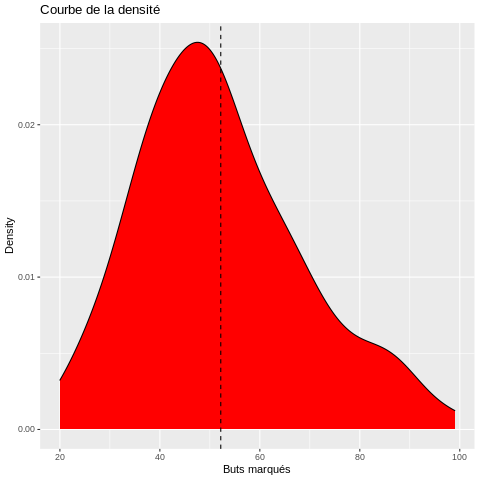

In [19]:
# 4.Diagramme de densité
%%R
library(ggplot2)
density <- ggplot(df, aes(x = df$Goals))

density + geom_density (fill = "red") + geom_vline(aes(xintercept = mean(df$Goals)), linetype = "dashed") +labs(title="Courbe de la densité",x="Buts marqués", y = "Density")



Cette courbe nous permet d'observer que le pic de densité est atteint à un certain seuil qui s'apparente à la valeur 52-53. Nous avons précédemment calculé la moyenne de buts de toutes les équipes, et avons eu une moyenne de 52,18. Par conséquent, on peut en déduire que le pic de densité correspond à la moyenne de buts de toutes les équipes. 

 **Nous allons illustrer nos données sous différents types de visualisations pour mieux répondre à notre problématique.**




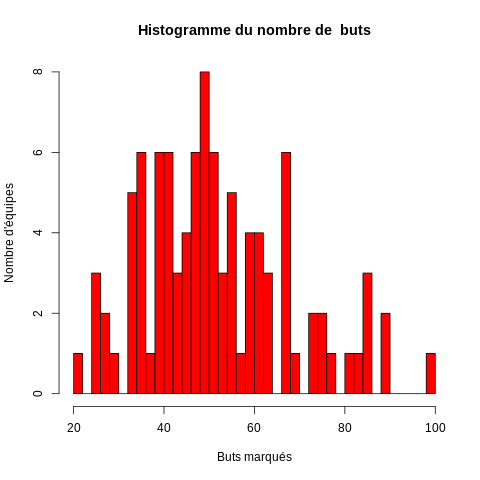

In [20]:
# 1.Histogramme du nombre de buts
%%R
hist(df$Goals,col="red",breaks=50,main="Histogramme du nombre de  buts",xlab="Buts marqués",ylab="Nombre d'équipes")

Cet histogramme nous permet de visualiser le nombre de buts marqués par toutes les équipes tout championnat confondus.

Exemple :
 
--> Une seule équipe marque plus de 99 ou 100 buts , c'est le cas du Bayern Munich

--> Une seule équipe marque moins de 20 ou 19 buts , c'est le cas de Sheffield United

In [21]:
%%R
d <- df %>% top_n(5, Goals)
d

                 Team Tournament Goals Shots.pg Possession. Pass. Rating
1       Bayern Munich Bundesliga    99     17.1        58.1  85.5   6.95
2 Paris Saint-Germain    Ligue 1    86     15.0        60.1  89.5   6.88
3            Atalanta    Serie A    90     16.3        53.5  83.5   6.84
4              Napoli    Serie A    86     17.0        54.1  87.0   6.81
5               Inter    Serie A    89     14.5        52.0  87.0   6.80


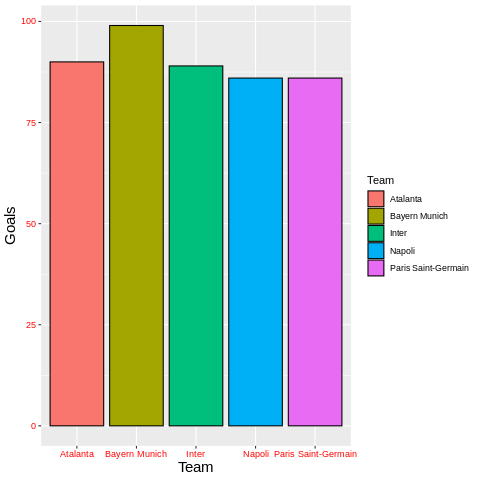

In [22]:
# 2.Diagramme en barre des cinq meilleures équipes en termes de buts marqués

%%R

Bar<- ggplot(d,  aes(x=Team, y=Goals))
Bar + geom_bar(stat="identity",aes(fill=Team),colour="Black") + 
  theme( axis.title.x =element_text(colour = 'Black',size=15),
        axis.title.y =element_text(colour = 'Black',size=15),
        axis.text.x = element_text(colour='red', size=9),
        axis.text.y = element_text(colour='red', size=9))




Ce diagramme en  barre nous affiche le nombre de buts des cinq meilleures équipes. Cela concorde avec les données trouvées précédemment.

3. **Zoom sur les intervalles de confiances**

    3.1   sur une moyenne

    3.2   sur une proportion






In [23]:
# 3.1.Intervalle de confiance sur une moyenne
%%R
t.test(df$Goals, conf.level = 0.95)


	One Sample t-test

data:  df$Goals
t = 31.412, df = 97, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 48.88652 55.48083
sample estimates:
mean of x 
 52.18367 



Notre intervalle de confiance est [0,49; 0,55] au seuil de confiance de 0,95. On peut ainsi dire, que la proportion de buts est concentrée dans l'intervalle [0,49; 0,55] au seuil de confiance de 0,95. 

In [24]:
# 3.2.Intervalle de confiance sur une proportion
%%R
prop.test(df$Shots.pg,df$Goals)


	98-sample test for equality of proportions without continuity
	correction

data:  df$Shots.pg out of df$Goals
X-squared = 64.706, df = 97, p-value = 0.9952
alternative hypothesis: two.sided
sample estimates:
   prop 1    prop 2    prop 3    prop 4    prop 5    prop 6    prop 7    prop 8 
0.1903614 0.1727273 0.1744186 0.1800000 0.2149254 0.1890411 0.2038961 0.2490909 
   prop 9   prop 10   prop 11   prop 12   prop 13   prop 14   prop 15   prop 16 
0.1946667 0.1805970 0.1811111 0.2517241 0.2352941 0.1986486 0.2000000 0.1720588 
  prop 17   prop 18   prop 19   prop 20   prop 21   prop 22   prop 23   prop 24 
0.1976744 0.1882353 0.2311475 0.1629213 0.1987654 0.2666667 0.2209677 0.1983871 
  prop 25   prop 26   prop 27   prop 28   prop 29   prop 30   prop 31   prop 32 
0.2234043 0.2452830 0.1913043 0.1684211 0.2102941 0.2283019 0.2093750 0.2200000 
  prop 33   prop 34   prop 35   prop 36   prop 37   prop 38   prop 39   prop 40 
0.2596154 0.2392857 0.3388889 0.2171875 0.2613636 0.1783333 0

**Nous allons à présent zoomer sur le nombre de buts marqués et sur les meilleures performances des 5 meilleures et pires équipes.**




In [25]:
#Création d'une variable qui stocke le data.frame df
%%R
SortByGoals = data.frame(df)

In [26]:
#Fonction de tri par ordre décroissant de buts marqués
%%R
SortByGoals <- SortByGoals[order(SortByGoals$Goals, decreasing = TRUE),]

In [27]:
# 1.Les cinq meilleures équipes en terme de buts marqués
%%R
Bestof5 <- head(SortByGoals,5)
Bestof5

                  Team Tournament Goals Shots.pg Possession. Pass. Rating
2        Bayern Munich Bundesliga    99     17.1        58.1  85.5   6.95
11            Atalanta    Serie A    90     16.3        53.5  83.5   6.84
20               Inter    Serie A    89     14.5        52.0  87.0   6.80
3  Paris Saint-Germain    Ligue 1    86     15.0        60.1  89.5   6.88
17              Napoli    Serie A    86     17.0        54.1  87.0   6.81


In [28]:
# 2.Les cinq pires équipes en termes de buts marqués
%%R
Worstof5 <- tail(SortByGoals,5)
Worstof5

                Team     Tournament Goals Shots.pg Possession. Pass. Rating
45            Fulham Premier League    27     11.6        50.0  81.2   6.63
77 Arminia Bielefeld     Bundesliga    26      9.8        44.1  74.6   6.53
97             Dijon        Ligue 1    25      9.2        46.9  80.0   6.42
98        Schalke 04     Bundesliga    25      8.9        46.2  76.5   6.41
94  Sheffield United Premier League    20      8.5        43.0  76.9   6.46


**REMARQUE : Nous avons ici réalisé une analyse sur les 5 meilleurs et pires équipes suivant un critère spécifique : le nombre de buts marqués. On constate une différence entre plusieurs paramètres qui sont : le nombre de tir par match, le pourcentage de possession de balle, la moyenne générale de l'équipe, mais aussi un pourcentage de passe plus réussis.**

**Les autres paramètres cités précédemment sont plus élevés lorsqu'on zoome sur la population avec le plus de buts marqués.**

**Faisons un zoom sur les moyennes des deux populations pour discuter des résultats**

In [29]:
# 3.Moyenne des 5 meilleurs équipes en terme de buts marqués
%%R
moy <-sapply(Bestof5,mean)
print(moy["Goals"])

Goals 
   90 


In [30]:
# 4.Moyenne des 5 pires équipes en terme de buts marqués
%%R
moy <-sapply(Worstof5,mean)
print(moy["Goals"])

Goals 
 24.6 


**REMARQUE : Il y a une nette différence de buts entre les 5 meilleurs et 5 pires équipes. En effet, lorsque nous observons les moyennes de ces deux populations, on remarque que les meilleures équipes ont une moyenne de buts de 90, tandis que les pires équipes ont une moyenne de buts de 24,6.**

**On va se poser la question suivante : Existe-il une corrélation entre le paramètre 'buts marqués' et les autres paramètres ?**

**Pour cela, on va réaliser un nuage de point et analyser sa droite de régression.**



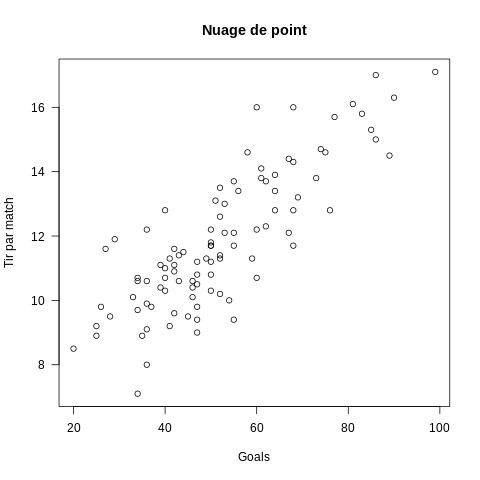

In [31]:
# 5.Nuage de point --> Paramètre pris en compte : Buts marqués et Tir par match
%%R
plot(df$Goals,df$Shots.pg, main = "Nuage de point", las=1,xlab="Goals", ylab="Tir par match")



L'allure du nuage de points révèle l'existe d'une liaison les deux variables quantitatives (ici buts et nombre de tir). Les variables sont dépendantes l'une de l'autre : elles sont en corrélation. La corrélation est ici positive quand le nombre de tir par match augmente alors le nombre de buts aussi.


R[write to console]: `geom_smooth()` using formula 'y ~ x'



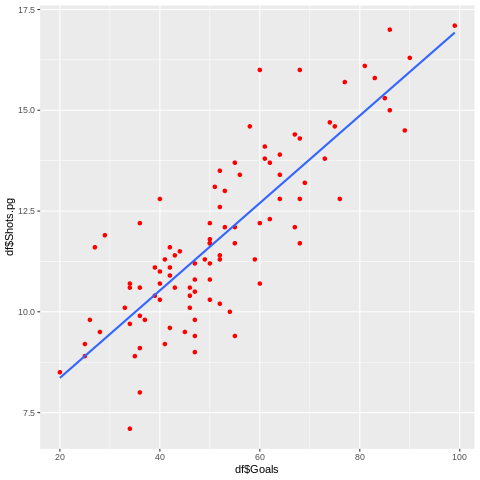

In [32]:
# 6.Droite de regreession
%%R
ggplot(df, aes(x = df$Goals,y=df$Shots.pg)) + geom_point(color='red') +  geom_smooth(method = "lm", se = FALSE)


**Le nuage de points montre bien que les valeurs de notre axe x dépendent des valeurs de l'axe y. On constate une certaine concentration des points dans une zone.**

**La tendance des points du nuage montre une relation linéaire positive avec une légère dispersion pour quelques données et une présence de valeurs extrêmes.**

In [33]:
%%R
MatriceCor <- cor(df$Goals, df$Shots.pg, method = c("pearson"))
MatriceCor

[1] 0.8296977


**On déduit que les deux paramètres testés, ici 'Buts marqués' et 'Pourcentage de tir par match' ont un degré de corrélation assez important. Il s'agit d'un accroissement simultané des deux paramètres,car l'axe x (Buts marqués) et l'axe y (Pourcentage de tir par match) évoluent dans le même sens.**

On peut tester la corrélation entre le paramètre 'Buts marqué' et 'Pourcentage de passe'

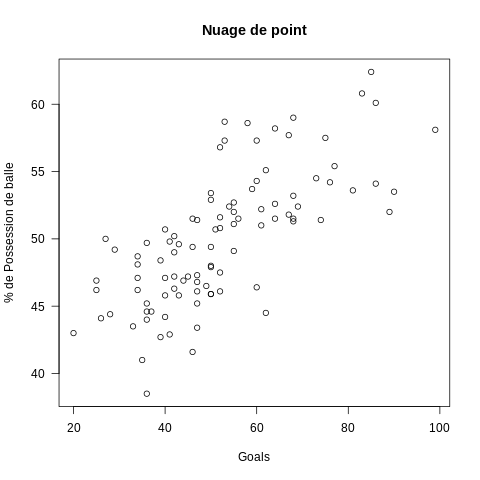

In [34]:
# 5.Nuage de point --> Paramètre pris en compte : Buts marqués et Pourcentage de Possessions de balle
%%R
plot(df$Goals,df$Possession, main = "Nuage de point", las=1,xlab="Goals", ylab="% de Possession de balle")



R[write to console]: `geom_smooth()` using formula 'y ~ x'



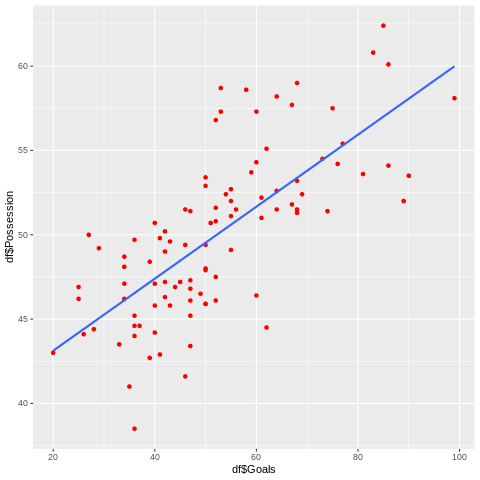

In [35]:
# 6.Droite de regression
%%R
ggplot(df, aes(x = df$Goals,y=df$Possession)) + geom_point(color='red') +  geom_smooth(method = "lm", se = FALSE)


In [36]:
%%R
MatriceCor <- cor(df$Goals, df$Possession., method = c("pearson"))
MatriceCor

[1] 0.7178338


**Même observation qu'auparavant, les nuages de points font apparaître une relation affine forte et positive entre les paramètres 'Buts marqués' et 'Pourcentage de Possessions de balle'.**

In [37]:
%%R
MatriceCor <- cor(df$Goals, df$Pass., method = c("pearson"))
MatriceCor

[1] 0.6942137


On peut voir que la corrélation entre les paramètres 'Buts marqués' et 'Pourcentage de passe'  avoisine les 70%.

**CONCLUSION : Lorsque une équipe marque plus de buts, les autres paramètres cités précédemment vont être également plus élevé qu'une équipe qui marque moins de buts. Grace aux nuages de points réalisés, nous avons observé une certaine corrélation entre le nombre de but marqué et la possession de balle, mais aussi le nombre de tirs par match. Pour répondre à la problématique, il existe bel et bien un lien entre le nombre de buts marqués et les autres paramètres (variables).On peut le voir avec les différentes corrélations examinés**.


# *Analyse sur l'influence entre le pourcentage de possession de balles et le pourcentage de passe réussis et inversement)*

---
##Problématique : Le pourcentage de passe réussis a t-elle une influence sur le pourcentage de possession de balles ?




###      **Analyse préliminaire**

0.   Analyse sur les moyennes des deux populations en terme de pourcentage de passe réalisés
  
  0.a Shapiro-test

  0.b Test de l'égalité des variances

  0.c Test de Welch

###      **Différents types de visualisations**

1.   Diagramme Circulaire

> Remarque

###      **Analyse appronfondi**


2. Nuage de points
3. Droite de regréssion
4. Analyse du résidus



###     **Conclusion**





Dans un premier temps, nous allons examiner la moyenne des deux populations, le poucentage des cinqs meilleurs équipes en terme de possession et les cinqs pires équipes en terme de possession.

In [38]:
# Affectation
%%R
SortByPercentageOfPass = data.frame(df)

In [39]:
%%R
SortByPercentageOfPass <- SortByPercentageOfPass[order(SortByPercentageOfPass$Possession., decreasing = TRUE),]


In [40]:
#Analyse sur les 5 meilleires équipes en terme de pourcentage de passes réalisés 
%%R
Bestof5Pass <- head(SortByPercentageOfPass,5)
Bestof5Pass

                  Team     Tournament Goals Shots.pg Possession. Pass. Rating
4            Barcelona         LaLiga    85     15.3        62.4  89.7   6.87
1      Manchester City Premier League    83     15.8        60.8  89.4   7.01
3  Paris Saint-Germain        Ligue 1    86     15.0        60.1  89.5   6.88
13           Liverpool Premier League    68     16.0        59.0  85.7   6.82
30             Sevilla         LaLiga    53     12.1        58.7  86.2   6.70


In [41]:
#Analyse sur les 5 pires équipes en terme de pourcentage de passes réalisés 
%%R
Worstof5Pass <- tail(SortByPercentageOfPass,5)
Worstof5Pass

                   Team     Tournament Goals Shots.pg Possession. Pass. Rating
57       Crystal Palace Premier League    41      9.2        42.9  76.1   6.61
68             Mainz 05     Bundesliga    39     11.1        42.7  71.3   6.57
52     Newcastle United Premier League    46     10.4        41.6  76.0   6.62
83 West Bromwich Albion Premier League    35      8.9        41.0  72.2   6.51
92                Cadiz         LaLiga    36      8.0        38.5  68.8   6.47


**Réalisation du shapiro.test pour savoir si notre série de données suit une loi normale.**

In [42]:
# 0.a.Shapiro test
%%R
shapiro.test(df$Possession.)


	Shapiro-Wilk normality test

data:  df$Possession.
W = 0.98437, p-value = 0.2986



**On peut voir ici qu’en appliquant la loi de Shapiro,la p-value est supérieur à alpha (0.05).Par conséquent, elle renvoie une p-value non significative. L'échantillon peut suivre une loi normale.**

**On va maintenant tester l'égalité des variances**

In [43]:
# 0.b. Test de l'égalité des variances
%%R
varPo <- var(df$Possession.)
varPo

[1] 23.91277


In [44]:
%%R
varPa <-var(df$Pass.)
varPa

[1] 21.99772


Les variances ne sont pas égales, on va donc faire le test de Welch.

In [45]:
%%R
df2 <- data.frame(dataset)

In [46]:
%%R
df2 <- Filter(is.numeric, dataset)


In [47]:
%%R
df2 <- subset( df2, select = -c(yellow_cards, red_cards, AerialsWon,Pass.,Rating,Goals,Shots.pg))



In [48]:
%%R
SortByPercentageOfPossession <- df2[order(SortByPercentageOfPass$Possession., decreasing = TRUE),]



In [49]:
%%R
BestPossession <- head(SortByPercentageOfPossession,5)
BestPossession

[1] 60.8 58.1 60.1 62.4 57.7


In [50]:
%%R
WorstPossession <- tail(SortByPercentageOfPossession,5)
WorstPossession

[1] 43.0 47.2 44.2 46.9 46.2


In [51]:
# 0.c.Test de Welch 
%%R
t.test(BestPossession, WorstPossession)


	Welch Two Sample t-test

data:  BestPossession and WorstPossession
t = 12.011, df = 7.9656, p-value = 2.207e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 11.56866 17.07134
sample estimates:
mean of x mean of y 
    59.82     45.50 



On constate que la moyenne des deux populations est assez différente. En effet, les meilleures cinq équipes équipes ont une possession de 60,20, et les cinq pires équipes ont une possession de 41,34, ce qui est assez faible. 

In [52]:
# 1.Diagramme circulaire sur les 5 meilleurs équipes en termes de buts marqués
%%R
d <- df %>% top_n(5, Goals)
d


                 Team Tournament Goals Shots.pg Possession. Pass. Rating
1       Bayern Munich Bundesliga    99     17.1        58.1  85.5   6.95
2 Paris Saint-Germain    Ligue 1    86     15.0        60.1  89.5   6.88
3            Atalanta    Serie A    90     16.3        53.5  83.5   6.84
4              Napoli    Serie A    86     17.0        54.1  87.0   6.81
5               Inter    Serie A    89     14.5        52.0  87.0   6.80


On affecte à la fonction d les 5 meilleurs équipes en termes de buts marqués.

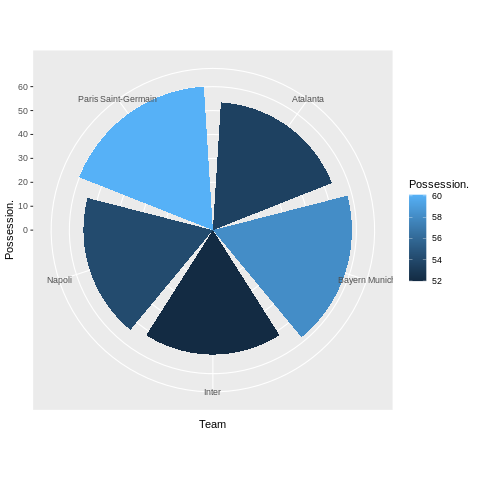

In [53]:
# 1.a. Diagramme circulaire
%%R
ggplot(data = d, aes(x = Possession., y = Team, fill = Possession.)) + geom_bar(stat = "identity") +  coord_polar("y")

**Ce diagramme circulaire nous affiche le pourcentage de passes des cinq meilleures équipes. On constate que le Paris-Saint-Germain est l'équipe avec le plus de possession de balles, mais aussi qui a le pourcentage de passe le plus réussi. On peut donc émettre l'hypothèse que le pourcentage de passe réussi influe sur le pourcentage de possessions de balles.**

**REMARQUE : Les équipes qui ont un score élevé en pourcentage de possession font beaucoup plus circuler la balle.**

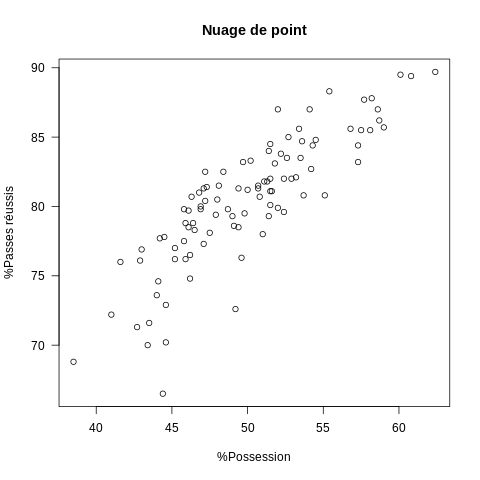

In [54]:
# 3.Nuage de point --> Paramètre pris en compte : Pourcentage en possession de balle et pourcentage de passes réussis.
%%R
plot(df$Possession.,df$Pass., main = "Nuage de point", las=1,xlab="%Possession", ylab="%Passes réussis")



R[write to console]: `geom_smooth()` using formula 'y ~ x'



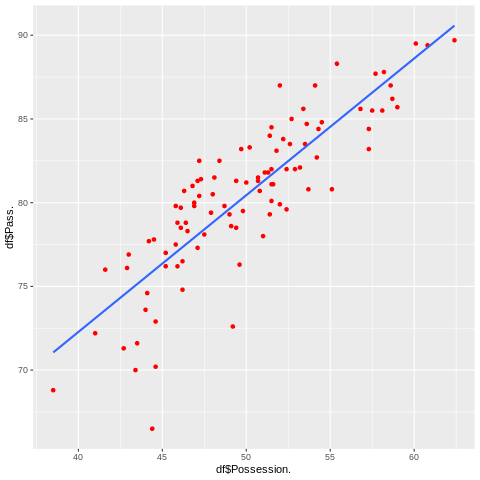

In [55]:
# 4.Droite de regression
%%R
ggplot(df, aes(x = df$Possession.,y=df$Pass.)) + geom_point(color='red') +  geom_smooth(method = "lm", se = FALSE)


Le nuage de points observé s'apparente à une droite croissante et révèle l'existence d'une liaison entre nos deux paramètres.
Le pourcentage de passes réussis et la possession de balle semblent entre dépendante l'une de l'autre. Notre hypothèse se confirme, il existe une forte corrélation entre nos deux paramètres.



In [56]:
%%R
cor(df$Possession.,df$Pass.)


[1] 0.8514583


Le coefficient de corrélation suit notre raisonnement précèdent. À partir de notre coefficient de corrélation, on peut dire que nos paramètres montre une forte relation linéaire ascendante.



**Analysons à présent les résidus, c'est-à-dire, les valeurs qui sont à l'écart**

In [57]:
# 5.Analyse du résidus --> Formule
%%R
beta1 <- cov(df$Pass.,df$Possession.)/var(df$Pass.)
beta0 <- mean(df$Possession.) - beta1*mean(df$Pass.)
print(beta1)
print(beta0)

[1] 0.8877476
[1] -21.41613


In [58]:
# 5.Analyse du résidus --> Modèle
%%R
mod1 <- lm(df$Possession.~df$Pass.)
coef(mod1)

(Intercept)    df$Pass. 
-21.4161299   0.8877476 


In [59]:
# 5.Analyse du résidus --> Valeurs des deux tableaux
%%R
str(df$Possession.)
str(df$Pass.)

 num [1:98] 60.8 58.1 60.1 62.4 57.7 54.5 55.4 49.1 57.5 51.8 ...
 num [1:98] 89.4 85.5 89.5 89.7 87.7 84.8 88.3 78.6 85.5 83.1 ...


In [60]:
# 5.Analyse du résidus --> Prédiction des valeurs
%%R
fitted.values(mod1)

       1        2        3        4        5        6        7        8 
57.94851 54.48629 58.03728 58.21483 56.43934 53.86487 56.97198 48.36083 
       9       10       11       12       13       14       15       16 
54.48629 52.35570 52.71080 55.81791 54.66384 53.15467 52.71080 51.20162 
      17       18       19       20       21       22       23       24 
55.81791 51.46795 47.82818 55.81791 53.77609 52.44447 50.31388 47.65063 
      25       26       27       28       29       30       31       32 
50.84653 53.50977 49.24858 52.00060 53.59854 55.10771 51.37917 54.04242 
      33       34       35       36       37       38       39       40 
54.57507 50.58020 52.44447 56.52811 49.42613 53.50977 50.31388 50.75775 
      41       42       43       44       45       46       47       48 
51.37917 42.14660 51.20162 50.75775 50.66898 51.37917 48.27206 48.53838 
      49       50       51       52       53       54       55       56 
54.57507 50.22510 48.98226 46.05269 52.97712 46.940

In [61]:
# 5.Analyse du résidus --> Tableau de résidus, des écarts
%%R
residuals(mod1)

          1           2           3           4           5           6 
 2.85149361  3.61370929  2.06271885  4.18516933  1.26066455  0.63513261 
          7           8           9          10          11          12 
-1.57198402  0.73916779  3.01370929 -0.55569645  0.78920451  2.78208787 
         13          14          15          16          17          18 
 4.33615977 -1.75466930 -0.11079549  0.09837544 -1.71791213  1.73205116 
         19          20          21          22          23          24 
 3.17181636 -3.81791213 -0.17609263  4.85552879  4.78612305 -3.15063412 
         25          26          27          28          29          30 
-3.54652552  3.79023166  3.15142018  2.19940259 -2.09854310  3.59228596 
         31          32          33          34          35          36 
 0.12082592 -1.34241691  2.22493453  0.91979877 -2.74447121  1.67188979 
         37          38          39          40          41          42 
-2.52612934  0.79023166  3.38612305 -0.05775075  1.

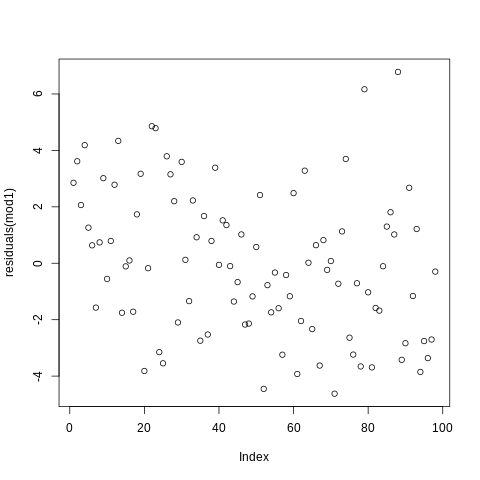

In [62]:
# 5.Analyse du résidus --> Répartition des écarts dans un nuage de points

%%R
plot(residuals(mod1))


On constate des valeurs extrêmes dans ce nuage de point, les points sont globalement présent dans l'intervalle [-2;4]. Cela se justifie par le coefficient de corrélation obtenu : 0,85. Il est donc logique que la majorité des points soient concentrés dans l'intervalle citée précédemment.

In [63]:
# 5.Analyse du résidus --> Application du calcul avec les troisièmes valeurs du tableau df$Possessions. et df$Pass.
%%R
beta1*89.5 + beta0

[1] 58.03728


In [64]:
# 5.Analyse du résidus --> Vérification à la main du résulat obtenu par rapport à la troisième valeur du tableau résiduals.

#60.1 VALEUR OBSERVE DANS LE TABLEAU - VALEUR OBTENUS SUITE AU CALCUL
60.1 - 58.03728

2.0627199999999988

On retrouve bien l'écart attendu dans le tableau residuals.

**CONCLUSION : Ainsi, nous constatons bel et bien que le pourcentage de passes réussis influe sur le pourcentage de possessions de balles. En effet, les deux paramètres sont liés, on a vu que plus le pourcentage de passes réussis était élevé plus le pourcentage de possession de balles avec l'exemple du Paris-Saint-Germain.**
**

